In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from gallery_probes_generator import GalleryProbesGenerator

In [2]:
data_generator = GalleryProbesGenerator(path_to_dataset='data/dataset1/', probes_length=200)

gallery_names, gallery_pictures = data_generator.get_gallery()

(5364, 22500)


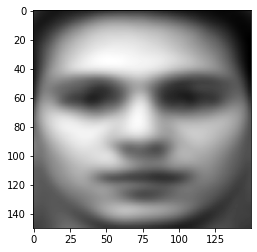

In [3]:
linear_pictures = np.array([picture.flatten() for person in gallery_pictures for picture in person])
print(linear_pictures.shape)

meanPoint = linear_pictures.mean(axis = 0)
mean_face = plt.imshow(np.reshape(meanPoint, (-1, 150)), cmap="gray")
plt.show()

# subtract mean face to every picture
linear_pictures_centered = linear_pictures - meanPoint

In [4]:
from sklearn.decomposition import PCA

training_data = np.transpose(linear_pictures_centered)
print(training_data.shape)

components = 500

pca = PCA(n_components = components).fit(training_data)

(22500, 5364)


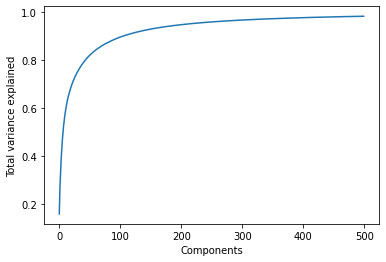

Variance explained with 500 components : 0.9809134353190102


In [5]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Components")
plt.ylabel("Total variance explained")
plt.show()

print(f"Variance explained with {components} components : {sum(pca.explained_variance_ratio_)}")

In [6]:
def normalize(v):
       norm = np.linalg.norm(v)
       if norm == 0:
          return v
       return v / norm

print('Computing eigenfaces...')
eigen_faces = list()
for vect in pca.components_:
    eigen_faces.append(normalize(np.dot(np.transpose(linear_pictures_centered), vect)))

eigen_faces = np.array(eigen_faces)

Computing eigenfaces...


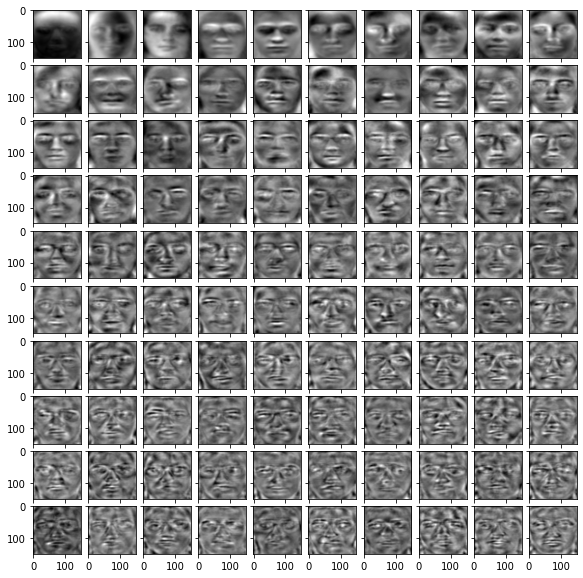

In [7]:
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(10, 10),
                 axes_pad=0.1,  # pad between axes in inch.
                 )
for ax, face in zip(grid, eigen_faces):
    # Iterating over the grid returns the Axes.
    ax.imshow(np.reshape(face, (-1, 150)), cmap="gray")

plt.show()

In [8]:
# if os.path.exists('data/dataset1/eigenface_npy/val_propres.npy') and os.path.exists('data/dataset1/eigenface_npy/vect_propres.npy') and os.path.exists('data/dataset1/eigenface_npy/w.npy'):
#     val_propres = np.load('data/dataset1/eigenface_npy/val_propres.npy', allow_pickle=True)
#     vect_propres = np.load('data/dataset1/eigenface_npy/vect_propres.npy', allow_pickle=True)
#     w = np.load('data/dataset1/eigenface_npy/w.npy', allow_pickle=True)
#
# else:
#     print('cov_d_transpose')
#     cov_d_transpose = (1/linear_pictures_centered.shape[1]-1) * np.dot(linear_pictures_centered, np.transpose(linear_pictures_centered))
#     print(cov_d_transpose.shape)
#
#     print('val et vec propre')
#     val_propres, vect_propres = np.linalg.eig(cov_d_transpose)
#
#     def normalize(v):
#            norm = np.linalg.norm(v)
#            if norm == 0:
#               return v
#            return v / norm
#
#     print('calcul des wi')
#     w = list()
#     for vect in vect_propres:
#         w.append(normalize(np.dot(np.transpose(linear_pictures_centered), vect)))
#
#     w = np.array(w)
#     print("save offline des tableaux")
#     np.save('data/dataset1/eigenface_npy/val_propres.npy', val_propres)
#     np.save('data/dataset1/eigenface_npy/vect_propres.npy', vect_propres)
#     np.save('data/dataset1/eigenface_npy/w.npy', w)

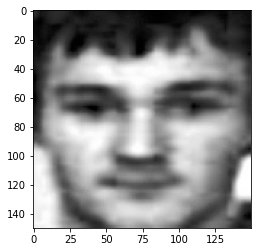

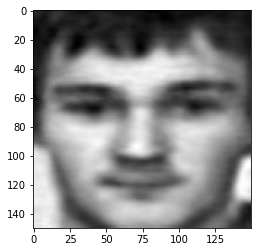

In [9]:
pierre = linear_pictures_centered[105]

alpha = np.dot(pierre, np.transpose(eigen_faces))

pierrot_le_s = meanPoint + np.dot(alpha, eigen_faces)

pierre_pic = plt.imshow(np.reshape(linear_pictures[105], (-1, 150)), cmap="gray")
plt.show()
pierrot_le_s_pic = plt.imshow(np.reshape(pierrot_le_s, (-1, 150)), cmap="gray")
plt.show()

In [10]:
new_gallery_pictures = list()
transpose_eigen_faces = np.transpose(eigen_faces)

for i, person in enumerate(gallery_pictures):
    list_of_pictures_coefs = list()
    for picture in person:
        picture = picture.flatten() - meanPoint
        list_of_pictures_coefs.append(np.dot(picture, transpose_eigen_faces))
    new_gallery_pictures.append(np.array(list_of_pictures_coefs))

new_gallery_pictures = np.array(new_gallery_pictures)

<ipython-input-10-59fa02f46ae1>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  new_gallery_pictures = np.array(new_gallery_pictures)


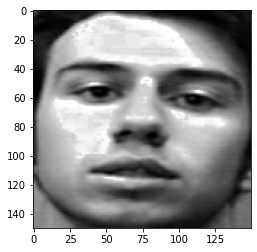

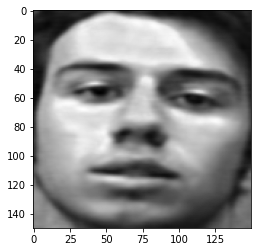

In [11]:
pierre = gallery_pictures[270][18]

pierrot_le_s = meanPoint + np.dot(new_gallery_pictures[270][18], eigen_faces)

pierre_pic = plt.imshow(pierre, cmap="gray")
plt.show()

pierrot_le_s_pic = plt.imshow(np.reshape(pierrot_le_s, (-1, 150)), cmap="gray")
plt.show()

In [12]:
names_probes, picture_probes = data_generator.get_merged_probes()


new_probe_pictures = list()

for picture in picture_probes:
    picture = picture.flatten() - meanPoint
    new_probe_pictures.append(np.dot(picture, transpose_eigen_faces))


new_probe_pictures = np.array(new_probe_pictures)

In [14]:
np.save("data/dataset1/eigen_faces_npy/gallery_eigenface_pictures.npy", new_gallery_pictures)
np.save("data/dataset1/eigen_faces_npy/probes_eigenface_pictures.npy", new_probe_pictures)